
# Regression Learning

- Data preprocessing
- Regression Algorithms

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data

The features are explained in Data_Info (some of them are removed)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings("ignore")

## 1. Load the Data

In [2]:
# load the csv
data = pd.read_csv('Centar_cleaned.csv')  

# visualize the data in a data frame
data

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,0.0,...,0,0,0,0,0,0,1,0,1,1
1,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,0.0,...,0,0,0,0,0,0,1,1,1,1
2,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,0.0,...,0,0,0,0,0,0,1,2,1,1
3,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,0.0,...,0,0,0,0,0,0,1,3,1,1
4,27.690000,5.62,0.44,2.61,0.6,0.0,0.0,1034.99,14.03,0.0,...,0,0,0,0,0,0,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.17,24.19,0.0,...,0,1,0,0,0,0,0,19,31,12
7348,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.36,19.20,0.0,...,0,1,0,0,0,0,0,20,31,12
7349,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.55,21.45,0.0,...,0,1,0,0,0,0,0,21,31,12
7350,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,0.0,...,0,1,0,0,0,0,0,22,31,12


In [3]:
# data statistics
data.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,precipIntensity,precipProbability,temperature,uvIndex,visibility,windBearing,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,72.802447,54.685523,0.419846,42.221562,0.000153,0.004354,55.398536,1.009347,5.702333,157.488002,...,0.000408,0.322905,0.0,0.046382,0.185528,0.168934,0.275027,11.794070,15.931039,6.318689
std,82.213323,19.914153,0.387737,12.873506,0.001423,0.031988,19.102358,1.798912,1.364594,39.917837,...,0.020198,0.467619,0.0,0.210325,0.388752,0.374719,0.446558,6.754697,8.791142,3.528810
min,0.270000,0.430000,0.000000,-2.210000,0.000000,0.000000,4.830000,0.000000,0.031000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,27.627500,38.522500,0.000000,32.620000,0.000000,0.000000,39.400000,0.000000,6.216000,150.882759,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,3.000000
50%,42.680000,53.390000,0.390000,42.800000,0.000000,0.000000,53.390000,0.000000,6.216000,157.488002,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,16.000000,6.000000
75%,77.680000,69.650000,0.750000,53.590000,0.000000,0.000000,69.610000,1.009347,6.216000,166.114391,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,18.000000,23.000000,9.000000
max,815.170000,104.870000,1.000000,69.810000,0.033200,0.240000,103.810000,9.000000,6.216000,359.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PM10                 7352 non-null   float64
 1   apparentTemperature  7352 non-null   float64
 2   cloudCover           7352 non-null   float64
 3   dewPoint             7352 non-null   float64
 4   humidity             7341 non-null   object 
 5   precipIntensity      7352 non-null   float64
 6   precipProbability    7352 non-null   float64
 7   pressure             7352 non-null   object 
 8   temperature          7352 non-null   float64
 9   uvIndex              7352 non-null   float64
 10  visibility           7352 non-null   float64
 11  windBearing          7352 non-null   float64
 12  windGust             7352 non-null   float64
 13  windSpeed            7319 non-null   float64
 14  no precip            7352 non-null   int64  
 15  rain                 7352 non-null   i

In [5]:
data.isna().sum()

PM10                    0
apparentTemperature     0
cloudCover              0
dewPoint                0
humidity               11
precipIntensity         0
precipProbability       0
pressure                0
temperature             0
uvIndex                 0
visibility              0
windBearing             0
windGust                0
windSpeed              33
no precip               0
rain                    0
sleet                   0
snow                    0
Clear                   0
Drizzle                 0
Foggy                   0
Mostly Cloudy           0
Overcast                0
Partly Cloudy           0
hour                    0
day                     0
month                   0
dtype: int64

# 2. Data Preprocessing

Try to standardize the data. (you can try also without it)
Do not standardize the target variable!

In [6]:
data['humidity'].value_counts()

0.94           513
0.88           296
0.87           215
0.83           208
0.82           189
              ... 
0.659706162      1
0..63            1
0.16             1
0.13             1
0.98             1
Name: humidity, Length: 89, dtype: int64

In [7]:
# finding all non-numeric rows in order to know what to replace 
print(data[pd.to_numeric(data['humidity'], errors='coerce').isnull()][['humidity']])

    humidity
6        NaN
38       NaN
91       NaN
92       NaN
93       NaN
131      NaN
132      NaN
133      NaN
134      NaN
135      NaN
136      NaN
138    0..68
140    0..63
141    0..64


In [8]:
data['humidity'].replace('0..63', '0.63', inplace=True)
data['humidity'].replace('0..64', '0.64', inplace=True)
data['humidity'].replace('0..68', '0.68', inplace=True)
data['humidity'].value_counts()

0.94           513
0.88           296
0.87           215
0.83           208
0.82           189
              ... 
0.14             3
0.659706162      1
0.16             1
0.13             1
0.98             1
Name: humidity, Length: 86, dtype: int64

In [9]:
data['humidity'] = pd.to_numeric(data['humidity'], errors='coerce')

In [10]:
data[data['humidity'].isna()]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
6,26.04,6.01,0.44,1.40,NaN,0.0,0.0,1036.13,11.99,0.0,...,0,0,0,0,0,0,1,6,1,1
38,238.02,26.95,0.19,13.74,NaN,0.0,0.0,1033.486667,26.95,0.0,...,0,0,0,0,0,0,1,14,2,1
91,48.59,32.50,0.75,22.54,NaN,0.0,0.0,1021.486667,36.39,0.0,...,0,0,0,0,1,0,0,19,4,1
92,48.60,28.12,0.44,23.70,NaN,0.0,0.0,1021.983333,35.01,0.0,...,0,0,0,0,0,0,1,20,4,1
93,46.40,33.44,0.44,22.42,NaN,0.0,0.0,1022.48,33.44,0.0,...,0,0,0,0,0,0,1,21,4,1
131,35.92,28.11,0.75,20.95,NaN,0.0,0.0,1022.296667,33.67,1.0,...,0,0,0,0,1,0,0,11,6,1
132,34.93,23.54,0.75,22.11,NaN,0.0,0.0,1022.4,32.03,1.0,...,0,0,0,0,1,0,0,12,6,1
133,36.11,29.01,0.75,23.80,NaN,0.0,0.0,1022.663333,33.20,1.0,...,0,0,0,0,1,0,0,13,6,1
134,33.84,33.44,0.44,23.92,NaN,0.0,0.0,1022.926667,33.44,0.0,...,0,0,0,0,0,0,1,14,6,1
135,32.97,27.26,0.44,20.71,NaN,0.0,0.0,1023.19,32.96,0.0,...,0,0,0,0,0,0,1,15,6,1


### Analyze null values in 'humidity' column, and try to fill it

In [11]:
data['humidity'].dtype

dtype('float64')

In [12]:
data[(data['day']==1) & (data['month']== 1)]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.02,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,0.000000,...,0,0,0,0,0,0,1,0,1,1
1,30.21,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,0.000000,...,0,0,0,0,0,0,1,1,1,1
2,29.40,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,0.000000,...,0,0,0,0,0,0,1,2,1,1
3,28.83,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,0.000000,...,0,0,0,0,0,0,1,3,1,1
4,27.69,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,0.000000,...,0,0,0,0,0,0,1,4,1,1
5,27.28,2.59,0.44,1.40,0.62,0.0,0.0,1035.56,11.99,0.000000,...,0,0,0,0,0,0,1,5,1,1
6,26.04,6.01,0.44,1.40,NaN,0.0,0.0,1036.13,11.99,0.000000,...,0,0,0,0,0,0,1,6,1,1
7,25.77,0.43,0.00,1.40,0.62,0.0,0.0,1036.213333,11.99,1.009347,...,0,1,0,0,0,0,0,7,1,1
8,24.47,4.87,0.00,3.24,0.57,0.0,0.0,1036.296667,15.63,1.009347,...,0,1,0,0,0,0,0,8,1,1
9,21.94,8.92,0.00,6.27,0.57,0.0,0.0,1036.38,19.12,1.009347,...,0,1,0,0,0,0,0,9,1,1


In [13]:
data.iloc[6, data.columns.get_loc('humidity')] = 0.62

In [14]:
data[(data['day']==2) & (data['month'] == 1)]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
24,142.950,8.34,0.00,2.47,0.76,0.000000,0.000000,1038.42,8.34,0.0,...,0,1,0,0,0,0,0,0,2,1
25,124.150,6.58,0.19,3.24,0.86,0.000000,0.000000,1038.29,6.58,0.0,...,0,0,0,0,0,0,1,1,2,1
26,117.240,6.58,0.19,3.24,0.86,0.000000,0.000000,1038.16,6.58,0.0,...,0,0,0,0,0,0,1,2,2,1
27,107.990,4.83,0.19,-0.38,0.79,0.000000,0.000000,1038.03,4.83,0.0,...,0,0,0,0,0,0,1,3,2,1
28,120.140,4.83,0.19,-0.38,0.79,0.000000,0.000000,1037.828333,4.83,0.0,...,0,0,0,0,0,0,1,4,2,1
29,191.260,4.84,0.19,-0.38,0.78,0.000153,0.004354,1037.626667,4.84,0.0,...,1,0,0,0,0,0,1,5,2,1
30,126.570,8.37,0.75,5.03,0.86,0.000000,0.000000,1037.425,8.37,0.0,...,0,0,0,0,1,0,0,6,2,1
31,122.150,11.99,0.75,6.78,0.79,0.000000,0.000000,1018.882155,11.99,0.0,...,0,0,0,0,1,0,0,7,2,1
32,183.530,13.80,0.75,8.58,0.79,0.000000,0.000000,1018.882155,13.80,1.0,...,0,0,0,0,1,0,0,8,2,1
33,202.510,19.20,0.75,8.58,0.63,0.000000,0.000000,1036.82,19.20,1.0,...,0,0,0,0,1,0,0,9,2,1


In [15]:
# se dodava sredna vrednost od humidity izmegju
data.iloc[38, data.columns.get_loc('humidity')] = 0.56

In [16]:
data[(data['day']==4) & (data['month'] == 1)]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
72,389.590,24.62,0.19,23.02,0.94,0.0,0.0,1022.7,24.62,0.0,...,0,0,0,1,0,0,0,0,4,1
73,378.570,24.62,0.44,24.62,1.00,0.0,0.0,1021.296667,24.62,0.0,...,0,0,0,1,0,0,0,1,4,1
74,338.380,24.51,0.75,26.62,0.94,0.0,0.0,1019.893333,28.21,0.0,...,0,0,0,0,1,0,0,2,4,1
75,283.040,22.47,0.75,24.82,0.94,0.0,0.0,1018.49,26.42,0.0,...,0,0,0,1,0,0,0,3,4,1
76,388.180,26.42,0.75,24.82,0.94,0.0,0.0,1018.06,26.42,0.0,...,0,0,0,1,0,0,0,4,4,1
77,652.880,24.62,0.75,24.62,1.00,0.0,0.0,1017.63,24.62,0.0,...,0,0,0,1,0,0,0,5,4,1
78,456.320,22.81,0.44,21.21,0.93,0.0,0.0,1017.2,22.81,0.0,...,0,0,0,1,0,0,0,6,4,1
79,375.120,24.62,0.44,23.02,0.94,0.0,0.0,1016.796667,24.62,0.0,...,0,0,0,1,0,0,0,7,4,1
80,465.840,24.62,0.44,24.62,1.00,0.0,0.0,1016.393333,24.62,1.0,...,0,0,0,1,0,0,0,8,4,1
81,510.850,25.00,1.00,28.41,0.94,0.0,0.0,1015.99,29.97,1.0,...,0,0,0,1,0,0,0,9,4,1


In [17]:
# se dodava po 0.05 vrednost na missing humidity
data.iloc[91, data.columns.get_loc('humidity')] = 0.60
data.iloc[92, data.columns.get_loc('humidity')] = 0.65
data.iloc[93, data.columns.get_loc('humidity')] = 0.70

In [18]:
data[(data['day']==6) & (data['month'] == 1)]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
120,58.50,19.84,0.44,17.80,0.70,0.0,0.0,1019.89,26.28,0.0,...,0,0,0,0,0,0,1,0,6,1
121,80.24,22.47,0.75,17.61,0.69,0.0,0.0,1019.526667,26.42,0.0,...,0,0,0,0,1,0,0,1,6,1
122,72.14,24.62,1.00,19.40,0.80,0.0,0.0,1019.163333,24.62,0.0,...,0,0,0,0,0,1,0,2,6,1
123,114.96,20.42,1.00,23.02,0.94,0.0,0.0,1018.8,24.62,0.0,...,0,0,0,0,0,1,0,3,6,1
124,68.50,24.62,1.00,23.02,0.94,0.0,0.0,1019.46,24.62,0.0,...,0,0,0,1,0,0,0,4,6,1
125,95.36,24.62,1.00,24.62,1.00,0.0,0.0,1020.12,24.62,0.0,...,0,0,0,0,0,1,0,5,6,1
126,79.89,24.62,1.00,23.02,0.94,0.0,0.0,1020.78,24.62,0.0,...,0,0,0,0,0,1,0,6,6,1
127,70.61,17.60,0.75,23.02,0.94,0.0,0.0,1021.216667,24.62,0.0,...,0,0,0,0,1,0,0,7,6,1
128,57.18,22.94,0.44,21.21,0.75,0.0,0.0,1021.653333,28.21,1.0,...,0,0,0,0,0,0,1,8,6,1
129,45.98,29.13,0.19,20.95,0.62,0.0,0.0,1022.09,32.49,1.0,...,0,0,0,0,0,0,1,9,6,1


In [19]:
# se dodava sredna vrednost od humidity izmegju
data.iloc[[131, 132, 133, 134, 135, 136], data.columns.get_loc('humidity')] = 0.58

In [20]:
data.isnull().sum()

PM10                    0
apparentTemperature     0
cloudCover              0
dewPoint                0
humidity                0
precipIntensity         0
precipProbability       0
pressure                0
temperature             0
uvIndex                 0
visibility              0
windBearing             0
windGust                0
windSpeed              33
no precip               0
rain                    0
sleet                   0
snow                    0
Clear                   0
Drizzle                 0
Foggy                   0
Mostly Cloudy           0
Overcast                0
Partly Cloudy           0
hour                    0
day                     0
month                   0
dtype: int64

### Analyze null values in 'windSpeed' column, and try to fill it

In [21]:
data['windSpeed'].dtype

dtype('float64')

In [22]:
data[data['windSpeed'].isna()][['windSpeed', 'hour', 'day', 'month']]

,windSpeed,hour,day,month
77,NaN,5,4,1
78,NaN,6,4,1
79,NaN,7,4,1
113,NaN,17,5,1
114,NaN,18,5,1
115,NaN,19,5,1
116,NaN,20,5,1
155,NaN,11,7,1
156,NaN,12,7,1
197,NaN,5,9,1


In [23]:
data[(data['windSpeed'].isna()) & (data['month'] == 1)]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
77,652.880,24.62,0.75,24.62,1.00,0.0,0.0,1017.63,24.62,0.000000,...,0,0,0,1,0,0,0,5,4,1
78,456.320,22.81,0.44,21.21,0.93,0.0,0.0,1017.2,22.81,0.000000,...,0,0,0,1,0,0,0,6,4,1
79,375.120,24.62,0.44,23.02,0.94,0.0,0.0,1016.796667,24.62,0.000000,...,0,0,0,1,0,0,0,7,4,1
113,27.740,27.63,1.00,22.14,0.67,0.0,0.0,1023.463333,32.01,0.000000,...,0,0,0,0,0,1,0,17,5,1
114,25.130,27.63,1.00,22.06,0.66,0.0,0.0,1023.6,32.01,0.000000,...,0,0,0,0,0,1,0,18,5,1
115,24.720,23.19,1.00,18.98,0.62,0.0,0.0,1023.433333,30.36,0.000000,...,0,0,0,0,0,1,0,19,5,1
116,26.740,24.31,0.75,18.89,0.65,0.0,0.0,1023.266667,29.01,0.000000,...,0,0,0,0,1,0,0,20,5,1
155,22.420,19.37,0.00,12.27,0.49,0.0,0.0,1034.78,29.08,1.009347,...,0,1,0,0,0,0,0,11,7,1
156,26.460,23.39,0.00,9.72,0.41,0.0,0.0,1034.72,30.44,1.009347,...,0,1,0,0,0,0,0,12,7,1
197,206.090,11.99,0.00,8.58,0.86,0.0,0.0,1039.476667,11.99,0.000000,...,0,1,0,0,0,0,0,5,9,1


In [24]:
# copy the whole dataset into a new wind_speed_df
wind_speed_df = data.copy()

In [25]:
# import knn imputer for filling missing values

from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=3)

cols = ['windSpeed']
wind_speed_df[cols] = transformer.fit_transform(wind_speed_df[cols])

In [26]:
wind_speed_df['windSpeed'].dtype

dtype('float64')

In [27]:
data = wind_speed_df.copy()

In [28]:
data.isna().sum()

PM10                   0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
precipIntensity        0
precipProbability      0
pressure               0
temperature            0
uvIndex                0
visibility             0
windBearing            0
windGust               0
windSpeed              0
no precip              0
rain                   0
sleet                  0
snow                   0
Clear                  0
Drizzle                0
Foggy                  0
Mostly Cloudy          0
Overcast               0
Partly Cloudy          0
hour                   0
day                    0
month                  0
dtype: int64

In [29]:
data['windSpeed'].dtype

dtype('float64')

### Correct non numeric values in column 'pressure' and convert it to numeric

In [30]:
data['pressure'].value_counts()

1018.882155    120
1018.42         18
1016.09         17
1015.82         16
1018.19         16
              ... 
1017.156667      1
1020.686667      1
1020.593333      1
1020.44          1
1033.283333      1
Name: pressure, Length: 4180, dtype: int64

In [31]:
# finding all non-numeric rows in order to know what to replace 
print(data[pd.to_numeric(data['pressure'], errors='coerce').isnull()][['pressure']])

          pressure
68   1026.096667.m
69       1024.99.m
107      1022.65.;


In [32]:
data['pressure'].replace('1026.096667.m', '1026.096667', inplace=True)
data['pressure'].replace('1024.99.m', '1024.99', inplace=True)
data['pressure'].replace('1022.65.;', '1022.65', inplace=True)
data['pressure'].value_counts()

1018.882155    120
1018.42         18
1016.09         17
1018.19         16
1017.6          16
              ... 
1020.686667      1
1020.593333      1
1020.44          1
1019.676667      1
1033.283333      1
Name: pressure, Length: 4178, dtype: int64

In [33]:
data['pressure'] = pd.to_numeric(data['pressure'], errors='coerce')

In [34]:
#pd.Index(set(data.columns).difference(set(data.select_dtypes(include=(np.number)).columns)))

In [35]:
data[data['pressure'].isna()]

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month


In [36]:
data['pressure'].dtype

dtype('float64')

In [37]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns:")
for column in data.columns:
    if is_numeric_dtype(data[column]):
        print(column)
print("----------------------------------")        
print("Category columns:")        
for column in data.columns:
    if is_string_dtype(data[column]):
        print(column)


Numeric columns:
PM10
apparentTemperature
cloudCover
dewPoint
humidity
precipIntensity
precipProbability
pressure
temperature
uvIndex
visibility
windBearing
windGust
windSpeed
no precip
rain
sleet
snow
Clear
Drizzle
Foggy
Mostly Cloudy
Overcast
Partly Cloudy
hour
day
month
----------------------------------
Category columns:


There isn't any numeric columns, all are categorical.

In [38]:
# Create X and y...X contains all the features, y contains the target variable (PM10)

In [39]:
data.drop(['sleet'], inplace=True, axis='columns')
data.drop(['Drizzle'], inplace=True, axis='columns')

In [40]:
y = pd.DataFrame(data.iloc[:,0])
X = data.drop(['PM10'], axis=1)

In [41]:
y

,PM10
0,30.020000
1,30.210000
2,29.400000
3,28.830000
4,27.690000
...,...
7347,51.040000
7348,59.000000
7349,72.295000
7350,85.590000


# 2.1 Basic EDA 

In [42]:
X.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'uvIndex', 'visibility', 'windBearing', 'windGust', 'windSpeed',
       'no precip', 'rain', 'snow', 'Clear', 'Foggy', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'hour', 'day', 'month'],
      dtype='object')

<AxesSubplot:xlabel='windGust', ylabel='Density'>

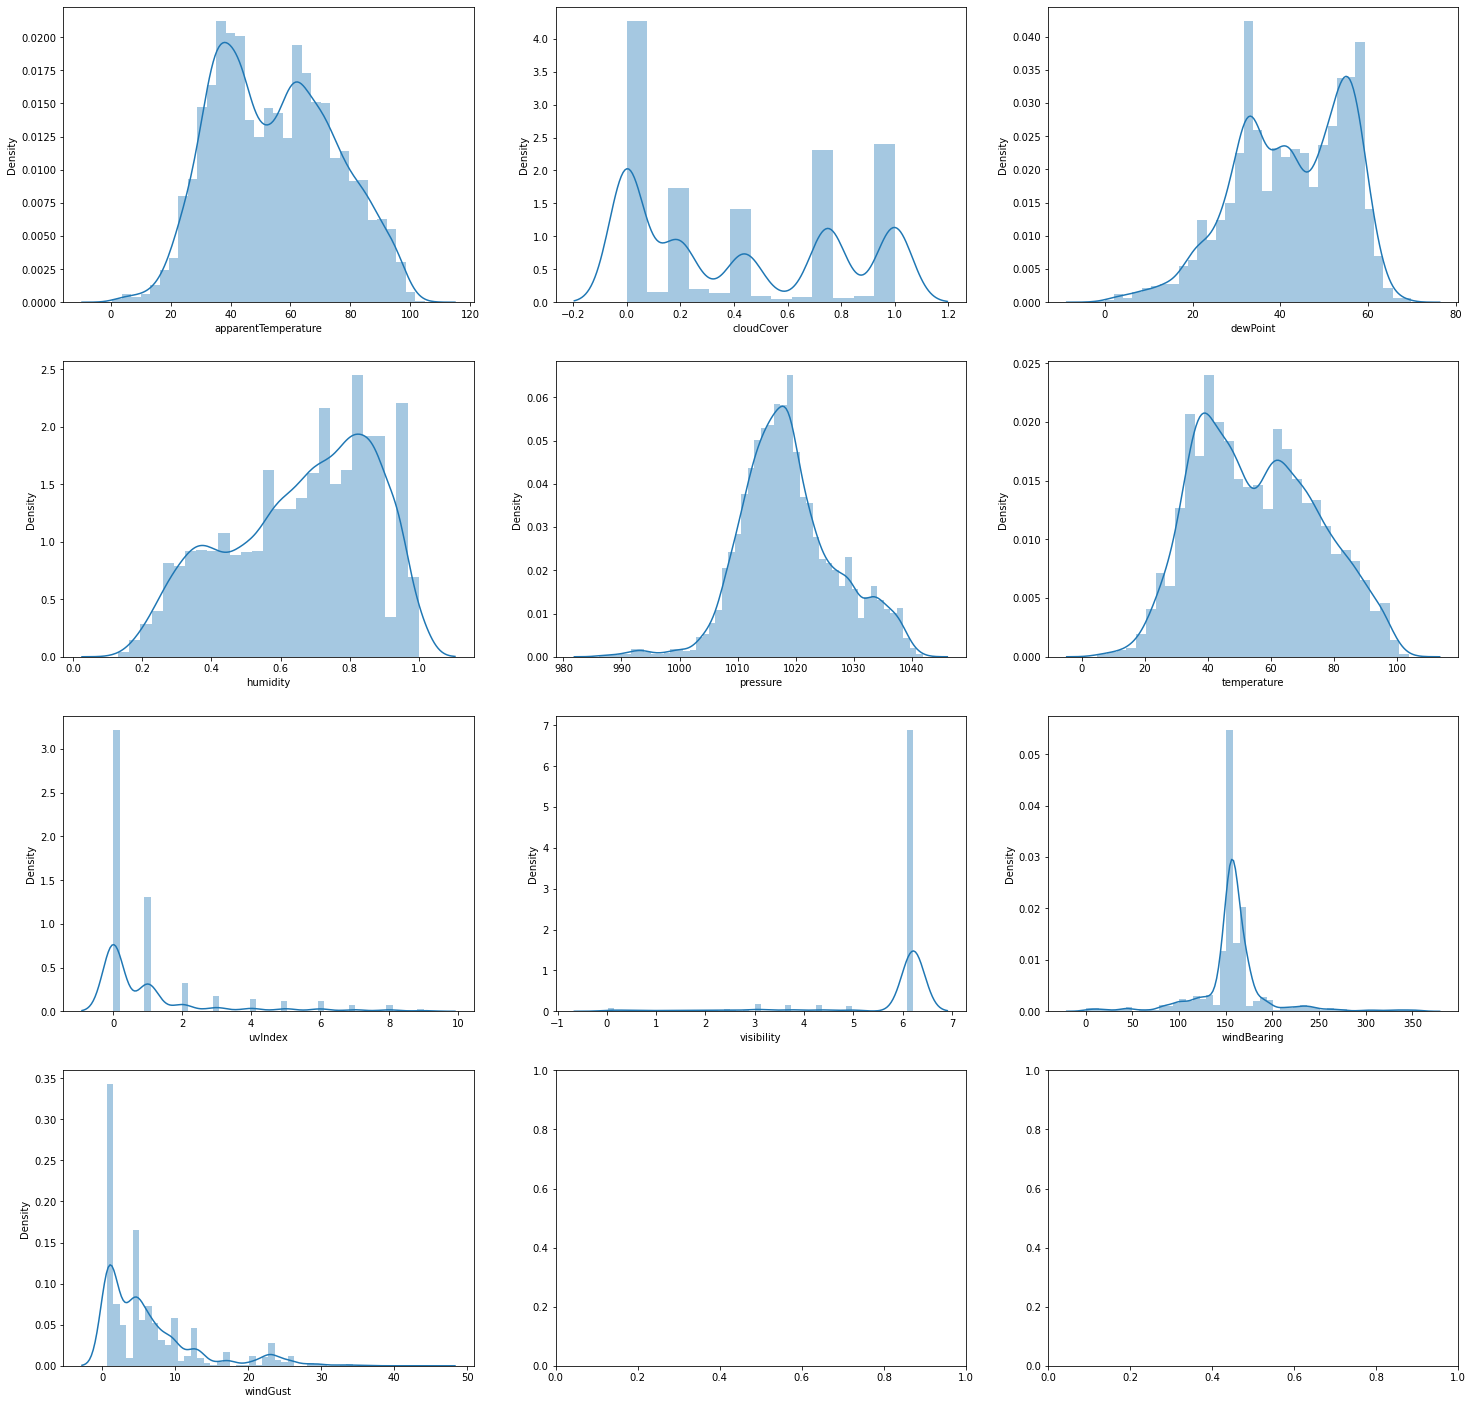

In [43]:
fig, ax = plt.subplots(4,3, figsize=(25,25))
sns.distplot(X['apparentTemperature'], label='apparentTemperature', ax=ax[0][0])
sns.distplot(X['cloudCover'], label='cloudCover', ax=ax[0][1])
sns.distplot(X['dewPoint'], label='dewPoint', ax=ax[0][2])
sns.distplot(X['humidity'], label='humidity', ax=ax[1][0])
sns.distplot(X['pressure'], label='pressure', ax=ax[1][1])
sns.distplot(X['temperature'], label='temperature', ax=ax[1][2])
sns.distplot(X['uvIndex'], label='uvIndex', ax=ax[2][0])
sns.distplot(X['visibility'], label='visibility', ax=ax[2][1])
sns.distplot(X['windBearing'], label='windBearing', ax=ax[2][2])
sns.distplot(X['windGust'], label='windGust', ax=ax[3][0])

<AxesSubplot:xlabel='windGust', ylabel='Density'>

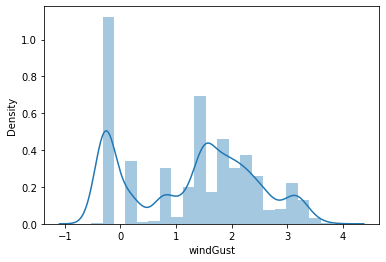

In [44]:
X['windGust'] = np.log(X['windGust'])
sns.distplot(X['windGust'], label='windGust')

Od opaska na desno, malku sega e podobreno, no seuste ne e bas normalna distribucija.

<AxesSubplot:xlabel='uvIndex', ylabel='Density'>

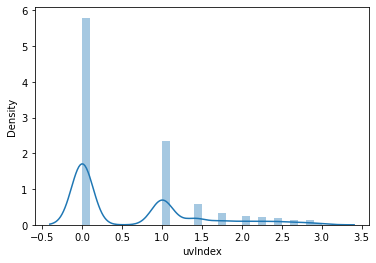

In [45]:
X['uvIndex'] = np.sqrt(X['uvIndex'])
sns.distplot(X['uvIndex'], label='uvIndex')

Very little changes distribution to the left.

## Correlation Matrix

Plot the Correlation Matrix between all the features and the target variable

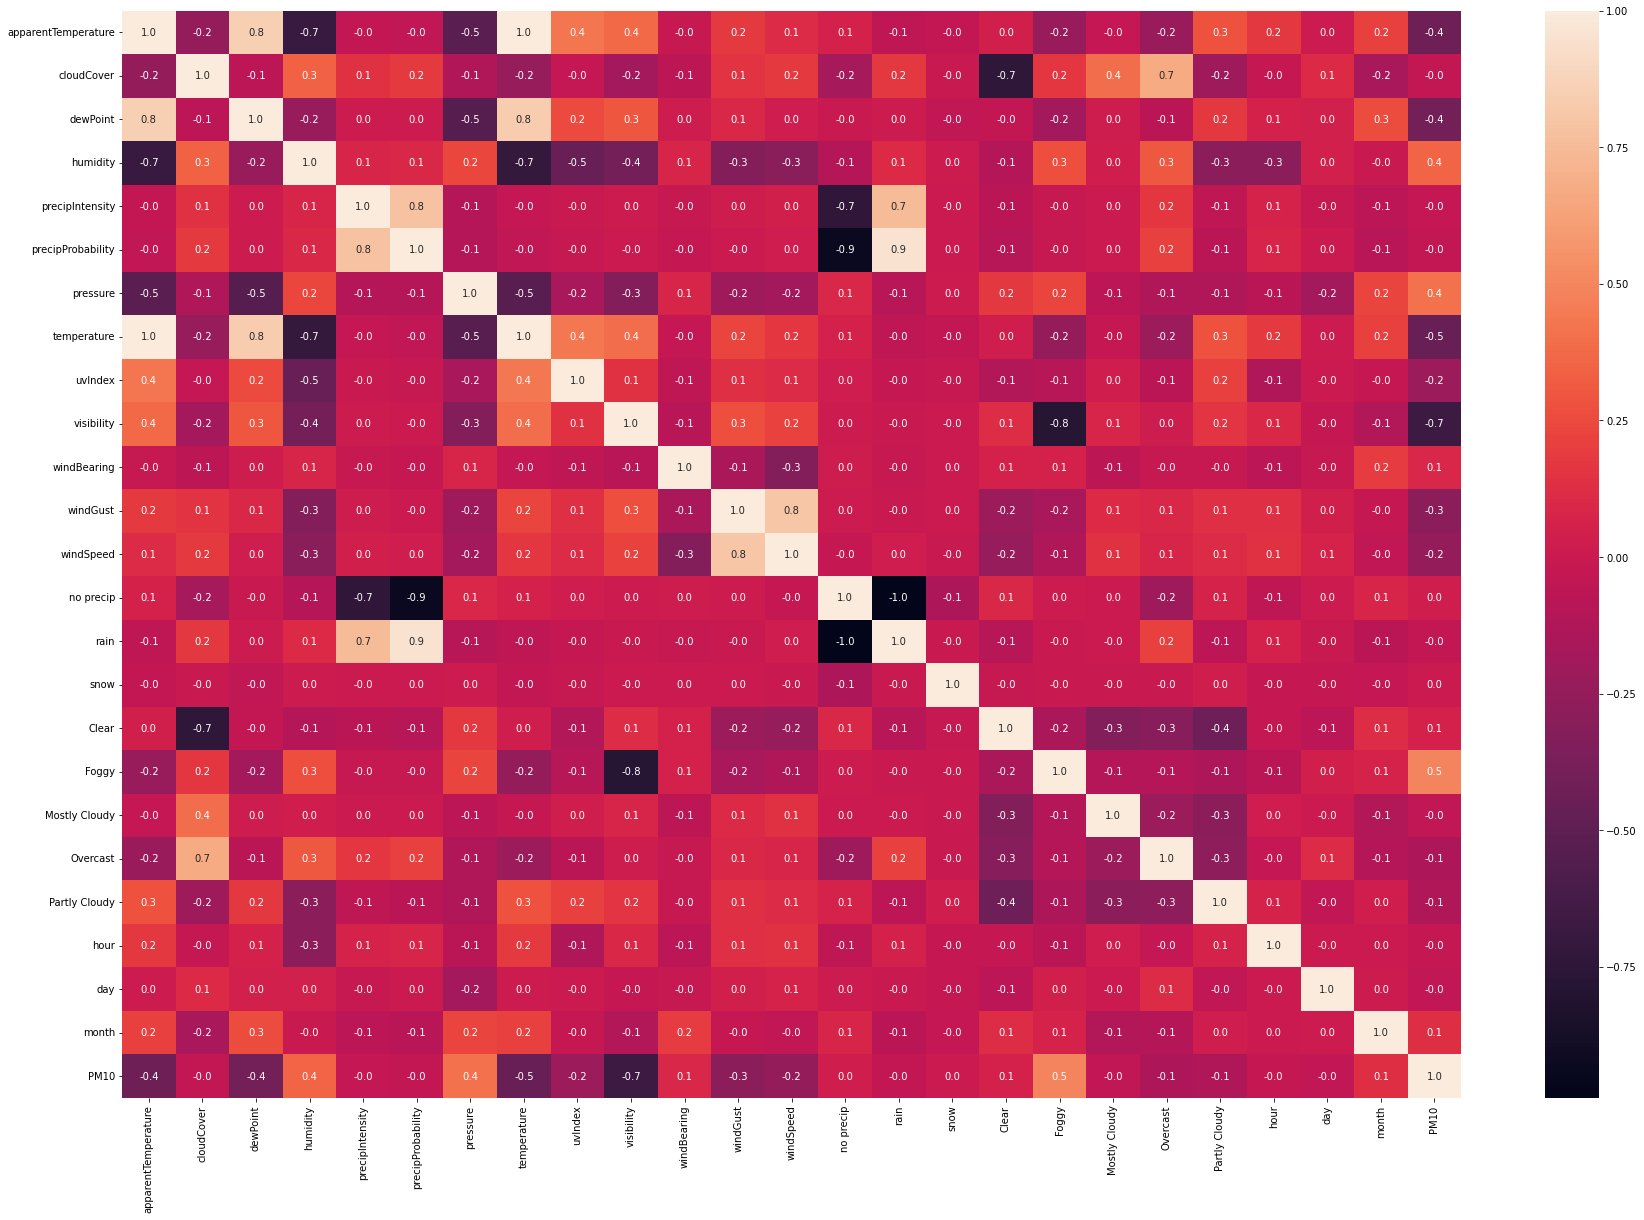

In [46]:
result = pd.concat([X, y], axis=1)
correlation_train = result.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

The highest feature correlations giving the little information about the dataset with 0.9 and 0.8 correlation are: precipProbability with rain, apparentTemperature with dewPoint, precipIntensity with precipProbability etc. The highest correlation with the target variable (PM10) is having the feature 'visibility'.

## Split the data 70%-30%

Set the random_state=1

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 3  Regression Learning

## 3.1 Create regressors with default parameters:
- Simple Linear Regression (using only the most correlated feature with the target)
- Linear Regression
- Polynomial with degree 2
- Polynomial with degree 3
- Dummy regressor
- Decision Tree Based algorithm
- optional: Random Forest, GradientBoosting, KNN, SVM ...

In [48]:
data['visibility'].value_counts()

6.216000    6260
3.108000     151
3.730000     145
4.346000     136
4.974000     121
            ... 
1.305000       2
5.702333       1
5.591000       1
0.809000       1
0.217000       1
Name: visibility, Length: 62, dtype: int64

In [49]:
X_one = X[['visibility']]
X_one_train = X_train[['visibility']]
X_one_test = X_test[['visibility']]

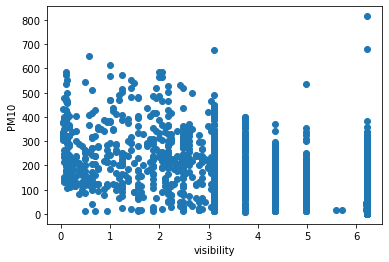

In [50]:
plt.scatter(X_one, y)
plt.xlabel('visibility')
plt.ylabel('PM10')
plt.show()

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_one_train, y_train)

# Make prediction using the testing set
y_pred = regr.predict(X_one_test)
y_pred.shape

(2206, 1)

In [52]:
print('coef = ', regr.coef_)
print('intercept = ', regr.intercept_)

coef =  [[-40.89626684]]
intercept =  [306.15253059]


In [53]:
print('Simple Linear Regressor performance:')

# The mean absolute error
print('- Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_pred))

# The mean squared error
print('- Mean squared error: %.2f'
     % mean_squared_error(y_test, y_pred))

# The Root mean squared error
print('- Root mean squared error: %.2f'
     % np.sqrt(mean_squared_error(y_test, y_pred)))
      
# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination(R2 score): %.2f'
     % r2_score(y_test, y_pred))      

Simple Linear Regressor performance:
- Mean absolute error: 38.17
- Mean squared error: 3525.50
- Root mean squared error: 59.38
- Coefficient of determination(R2 score): 0.46


The MAE of 38.17 is too high to say that our algorithm is predicting well. R2 is too small.

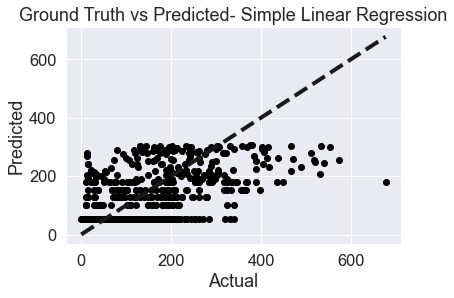

In [54]:
# Plot outputs
sns.set(font_scale=1.5)
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ground Truth vs Predicted- Simple Linear Regression')
plt.show()

The comparison between actual and predicted target variable PM10 are mostly similar, but they are also many where there are high differences.

#### Linear Regression

In [55]:
def metrics (real, predicted):
    
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mean_squared_error(real, predicted))
    r2 = r2_score(real, predicted)
    
    return mae, mse, rmse, r2

In [56]:
# Create linear regressor
lin = linear_model.LinearRegression()

# Train the models
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

Polynomial with degree 2

In [57]:
X_train.shape

(5146, 24)

In [58]:
y_train.shape

(5146, 1)

In [59]:
degreE = 2
poly = PolynomialFeatures (degree=degreE)
X_poly = poly.fit_transform(X_train)

lin2 =linear_model.LinearRegression()
lin2.fit(X_poly, y_train)

X_poly_test = poly.transform(X_test)
y_pred_poly2 = lin2.predict(X_poly_test)

print('Number of initial features', X_train.shape[1])
print('Number of polynomial features', X_poly.shape[1])
print("C(10 +", degreE,",", degreE, ")= ", X_poly.shape[1])

Number of initial features 24
Number of polynomial features 325
C(10 + 2 , 2 )=  325


There are total 325 features in the data, only with degree 2

In [60]:
y_test.shape

(2206, 1)

In [61]:
y_pred_poly2.shape

(2206, 1)

In [62]:
mae_poly2 = mean_absolute_error(y_test, y_pred_poly2)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
r2_poly2 = r2_score(y_test, y_pred_poly2)

In [63]:
print('mae_poly2',mae_poly2)
print('r2_poly2', r2_poly2)

mae_poly2 30.375860293622512
r2_poly2 0.37362599175255085


The metrics are slightly improved

Polynomial with degree 3:

In [64]:
degreE = 3
poly = PolynomialFeatures (degree=degreE)
X_poly = poly.fit_transform(X_train)

lin3 =linear_model.LinearRegression()
lin3.fit(X_poly, y_train)

X_poly_test = poly.transform(X_test)
y_pred_poly3 = lin3.predict(X_poly_test)

print('Number of initial features', X_train.shape[1])
print('Number of polynomial features', X_poly.shape[1])
print("C(10 +", degreE,",", degreE, ")= ", X_poly.shape[1])

Number of initial features 24
Number of polynomial features 2925
C(10 + 3 , 3 )=  2925


In [65]:
mae_poly3 = mean_absolute_error(y_test, y_pred_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
rmse_poly3 = np.sqrt(mean_squared_error(y_test, y_pred_poly3))
r2_poly3 = r2_score(y_test, y_pred_poly3)

In [66]:
print('mae_poly3',mae_poly3)
print('r2_poly3', r2_poly3)

mae_poly3 327.7934272187148
r2_poly3 -3541.252878941091


This result with degree 3 is really surprising :)

Dummy regressor

In [67]:
# create Dummy regressor with 'mean'
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
y_pred_dumm = dummy_regr.predict(X_test)

mae_dumm = mean_absolute_error(y_test, y_pred_dumm)
mse_dumm = mean_squared_error(y_test, y_pred_dumm)
rmse_dumm = np.sqrt(mean_squared_error(y_test, y_pred_dumm))
r2_dumm = r2_score(y_test, y_pred_dumm)

optional: Random Forest, GradientBoosting, KNN, SVM

In [68]:
# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# KNN Regressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X_train, y_train)
y_pred_knn = knnr.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

# SVM Regressor
svmr = SVR(C=250, epsilon=0.6)
svmr.fit(X_train, y_train)
y_pred_svm = svmr.predict(X_test)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

In [69]:
print('mae_rf',mae_rf)
print('r2_rf', r2_rf)

mae_rf 20.570454207909172
r2_rf 0.8244086307104459


In [70]:
print('mae_gb',mae_gb)
print('r2_gb', r2_gb)

mae_gb 16.963561181008785
r2_gb 0.8436235233429303


In [71]:
print('mae_knn',mae_knn)
print('r2_knn', r2_knn)

mae_knn 30.781452151653536
r2_knn 0.5447495265136204


In [72]:
print('mae_svm',mae_svm)
print('r2_svm', r2_svm)

mae_svm 40.13206104194608
r2_svm 0.161578241363873


## 3.2  Compare thevalue_countsSE, RMSE and R2 values in a table

In [73]:
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Linear Regression': [mae_lin, mse_lin, rmse_lin, r2_lin],
       'Poly2': [mae_poly2, mse_poly2, rmse_poly2, r2_poly2],
       'Poly3': [mae_poly3, mse_poly3, rmse_poly3, r2_poly3],
       'Dummy': [mae_dumm, mse_dumm, rmse_dumm, r2_dumm],
       'RF': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'GB': [mae_gb, mse_gb, rmse_gb, r2_gb],
       'KNN': [mae_knn, mse_knn, rmse_knn, r2_knn],
       'SVM': [mae_svm, mse_svm, rmse_svm, r2_svm],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Linear Regression', 'Poly2', 'Poly3', 'Dummy', 'RF', 'GB', 'KNN', 'SVM'])
comparison

,Metrics,Linear Regression,Poly2,Poly3,Dummy,RF,GB,KNN,SVM
0,MAE,33.721397,30.375860,3.277934e+02,54.804403,20.570454,16.963561,30.781452,40.132061
1,MSE,2672.312237,4091.657591,2.313903e+07,6532.782034,1147.014004,1021.496724,2973.828784,5476.815302
2,RMSE,51.694412,63.966066,4.810304e+03,80.825627,33.867595,31.960862,54.532823,74.005509
3,R2,0.590907,0.373626,-3.541253e+03,-0.000075,0.824409,0.843624,0.544750,0.161578


The best results we get with GradientBoosting algorithm

## 3.3 Visualize the Predictions/Errors for each regressor

Visualize the errors (actual vs predicted)

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

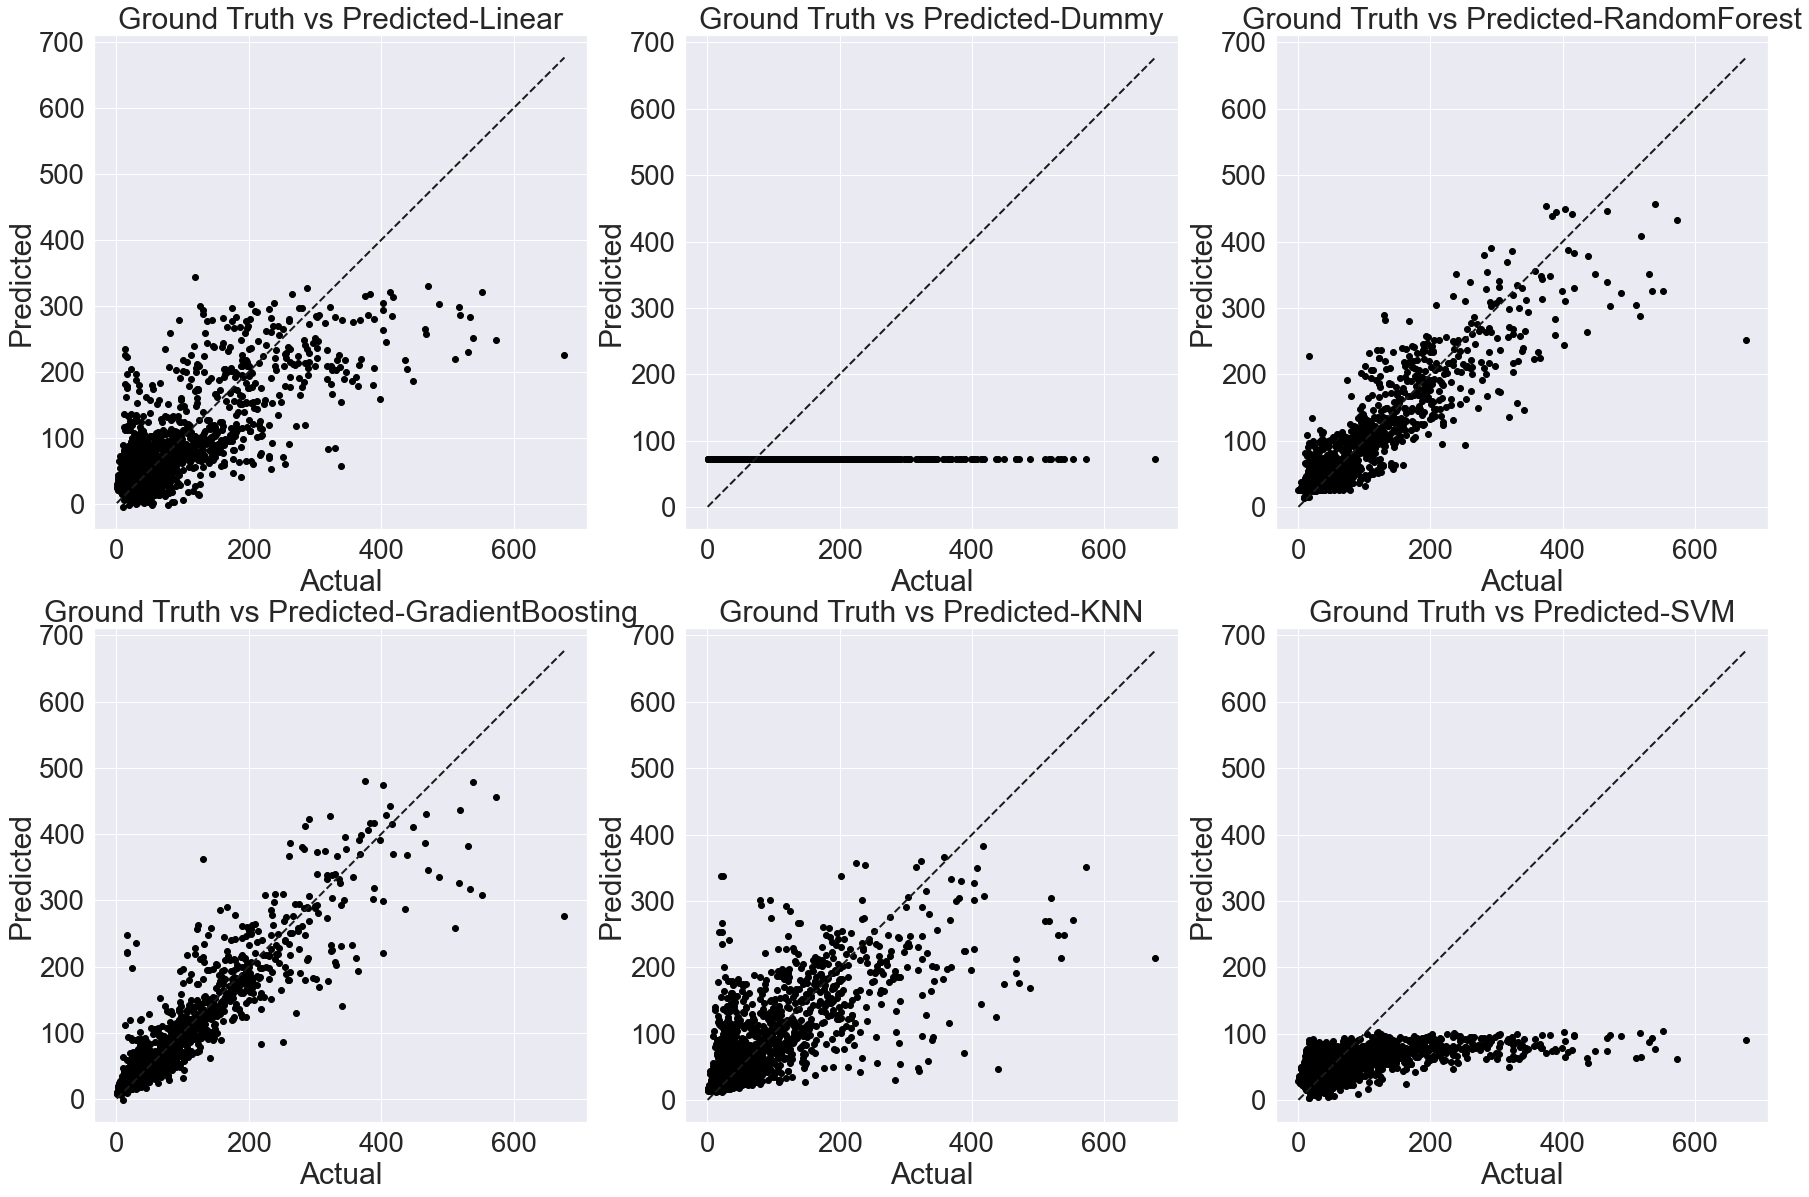

In [74]:
# Visualize and compare the results
sns.set(font_scale=2.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30,20))

ax1.scatter(y_test, y_pred_lin, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted-Linear')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_dumm, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted-Dummy')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_pred_rf, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Ground Truth vs Predicted-RandomForest')
ax3.set(xlabel='Actual', ylabel='Predicted')

ax4.scatter(y_test, y_pred_gb, color='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_title('Ground Truth vs Predicted-GradientBoosting')
ax4.set(xlabel='Actual', ylabel='Predicted')

ax5.scatter(y_test, y_pred_knn, color='black')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_title('Ground Truth vs Predicted-KNN')
ax5.set(xlabel='Actual', ylabel='Predicted')

ax6.scatter(y_test, y_pred_svm, color='black')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_title('Ground Truth vs Predicted-SVM')
ax6.set(xlabel='Actual', ylabel='Predicted')

# 4. Evaluation Metrics

For all the comparisons use the following algorithms/regressors:
- Linear Regression
- Dummy regressor

## 4.1 Evaluate the models using 80-20 random split
- Compare the MAE, MSE, RMSE and R2 values in a table 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [76]:
# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [77]:
mae_rf, mse_rf, rmse_rf, r2_rf = metrics(y_test, y_pred_rf)
mae_gb, mse_gb, rmse_gb, r2_gb = metrics(y_test, y_pred_gb)

#construct the comparison table
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'Gradient Boost': [mae_gb, mse_gb, rmse_gb, r2_gb],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Random Forest', 'Gradient Boost'])
comparison

,Metrics,Random Forest,Gradient Boost
0,MAE,19.966070,16.692136
1,MSE,1069.363566,956.766940
2,RMSE,32.701125,30.931649
3,R2,0.828772,0.846801


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

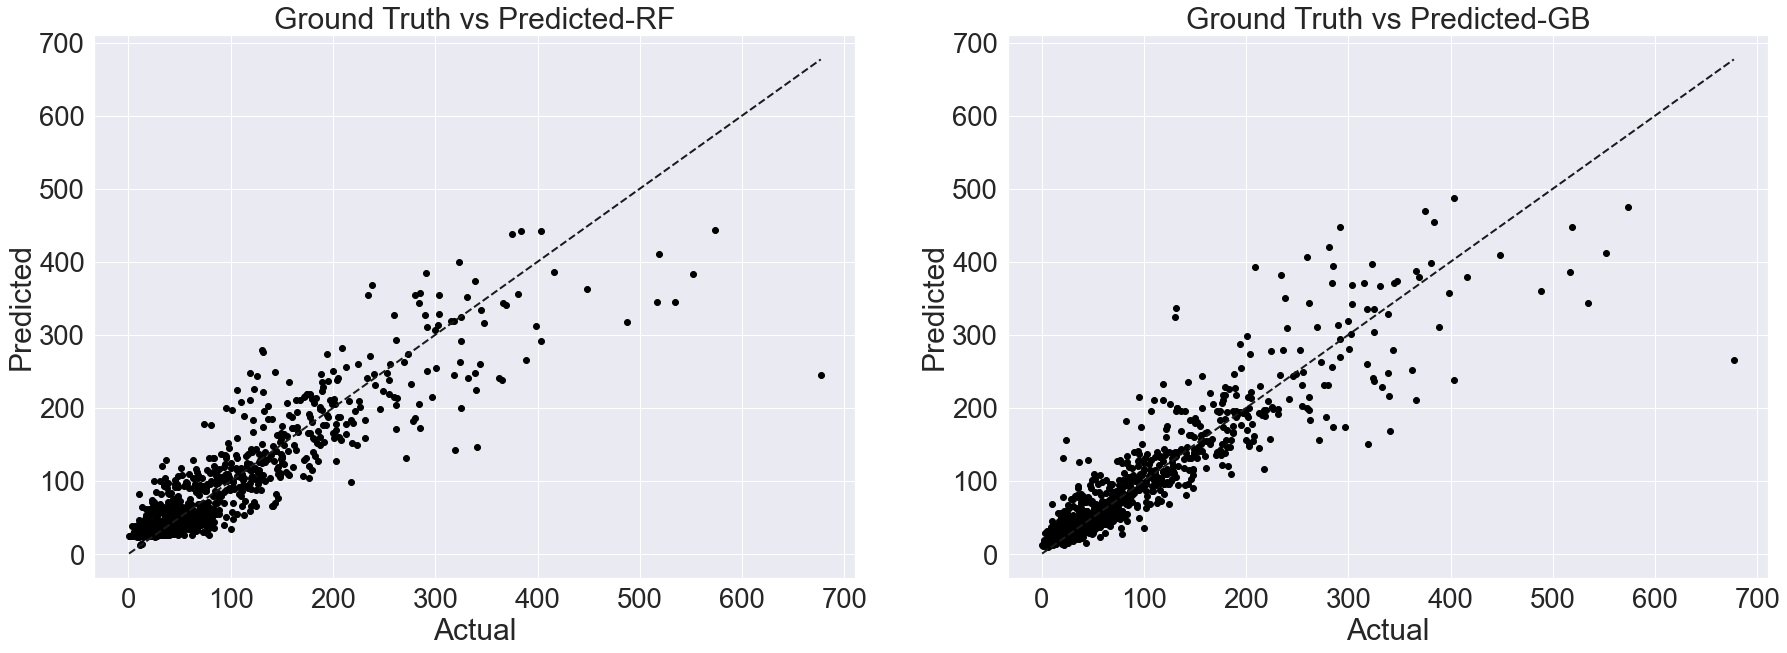

In [78]:
# Visualize and compare the results
sns.set(font_scale=2.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.scatter(y_test, y_pred_rf, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted-RF')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_gb, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted-GB')
ax2.set(xlabel='Actual', ylabel='Predicted')

## 4.2 Evaluate the models with manual separation
Use the first 6000 samples as train, the rest for test

- Compare the MAE, MSE, RMSE and R2 values in a table

In [79]:
X.shape

(7352, 24)

In [80]:
# split the data...train the first 6000 instances, the rest is the test
X_train = X[0:6000]
X_test = X[6001:7351]

y_train = y[0:6000]
y_test = y[6001:7351]

In [81]:
# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [82]:
mae_rf, mse_rf, rmse_rf, r2_rf = metrics(y_test, y_pred_rf)
mae_gb, mse_gb, rmse_gb, r2_gb = metrics(y_test, y_pred_gb)

#construct the comparison table
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'Gradient Boost': [mae_gb, mse_gb, rmse_gb, r2_gb],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Random Forest', 'Gradient Boost'])
comparison

,Metrics,Random Forest,Gradient Boost
0,MAE,97.957532,100.461616
1,MSE,16960.303969,17227.761178
2,RMSE,130.231732,131.254566
3,R2,-0.539219,-0.563492


Much worse :(

## 4.3 Evaluate the models using 80-20 random split - STRATIFIED
Compare the MAE, MSE, RMSE and R2 values in a table

In [83]:
bins = np.linspace(5, 55, 25)
bins = bins.astype(int)
y_binned = np.digitize(y, bins)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned)

In [84]:
# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [85]:
mae_rf, mse_rf, rmse_rf, r2_rf = metrics(y_test, y_pred_rf)
mae_gb, mse_gb, rmse_gb, r2_gb = metrics(y_test, y_pred_gb)

#construct the comparison table
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'Gradient Boost': [mae_gb, mse_gb, rmse_gb, r2_gb],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Random Forest', 'Gradient Boost'])
comparison

,Metrics,Random Forest,Gradient Boost
0,MAE,21.835862,17.978273
1,MSE,1510.825804,1286.624959
2,RMSE,38.869343,35.869555
3,R2,0.795858,0.826152


(array([ 257.,  291.,  394.,  492.,  385.,  415.,  381.,  388.,  281.,
         264., 2069.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30, 32, 34, 36, 38,
        40, 42, 44, 46, 48, 50, 52, 55]),
 <BarContainer object of 24 artists>)

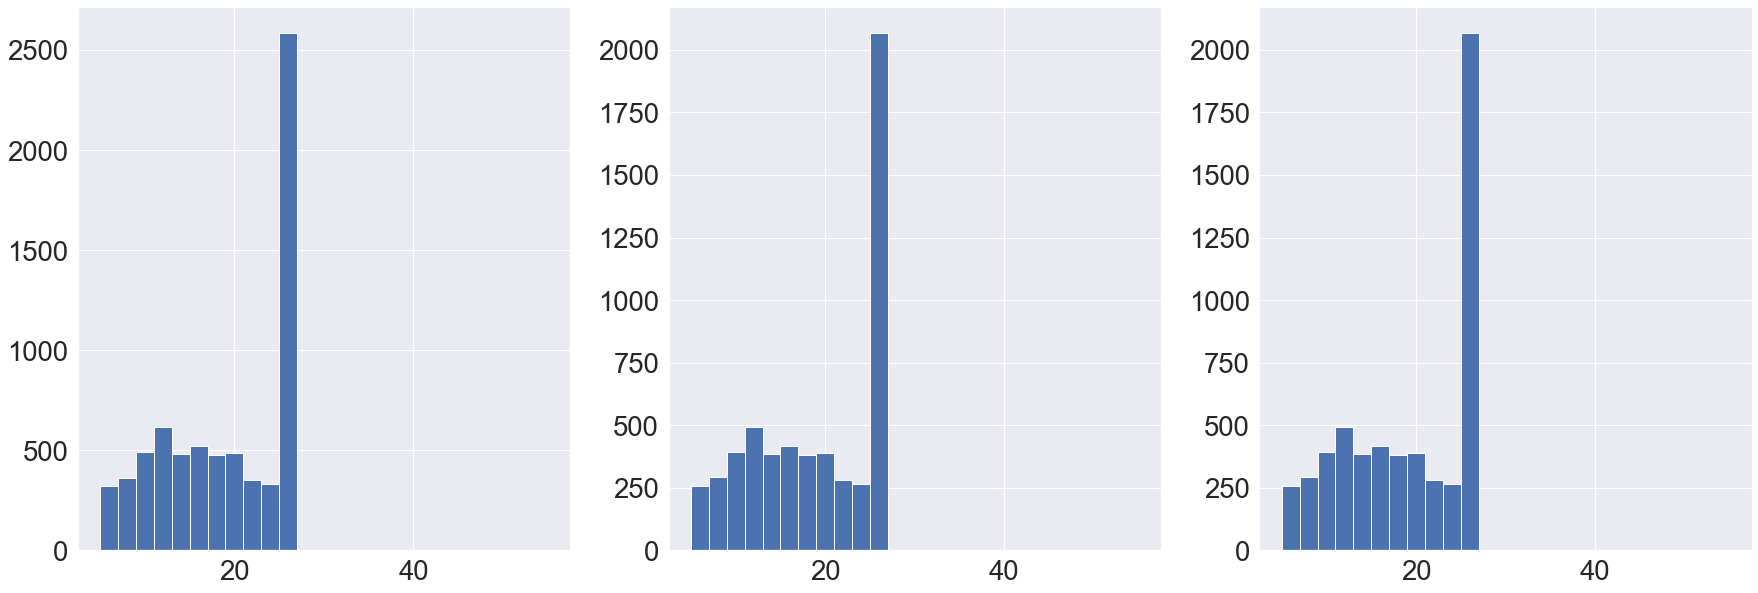

In [86]:
# plot the histograms for the whole dataset, the train and the test
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,10))

ax1.hist(y_binned, bins)

y_train_binned = np.digitize(y_train, bins)
ax2.hist(y_train_binned, bins)

y_test_binned = np.digitize(y_train, bins)
ax3.hist(y_test_binned, bins)

All three looks identical, which is good. What is not good that most of the data is binned in the last bin

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

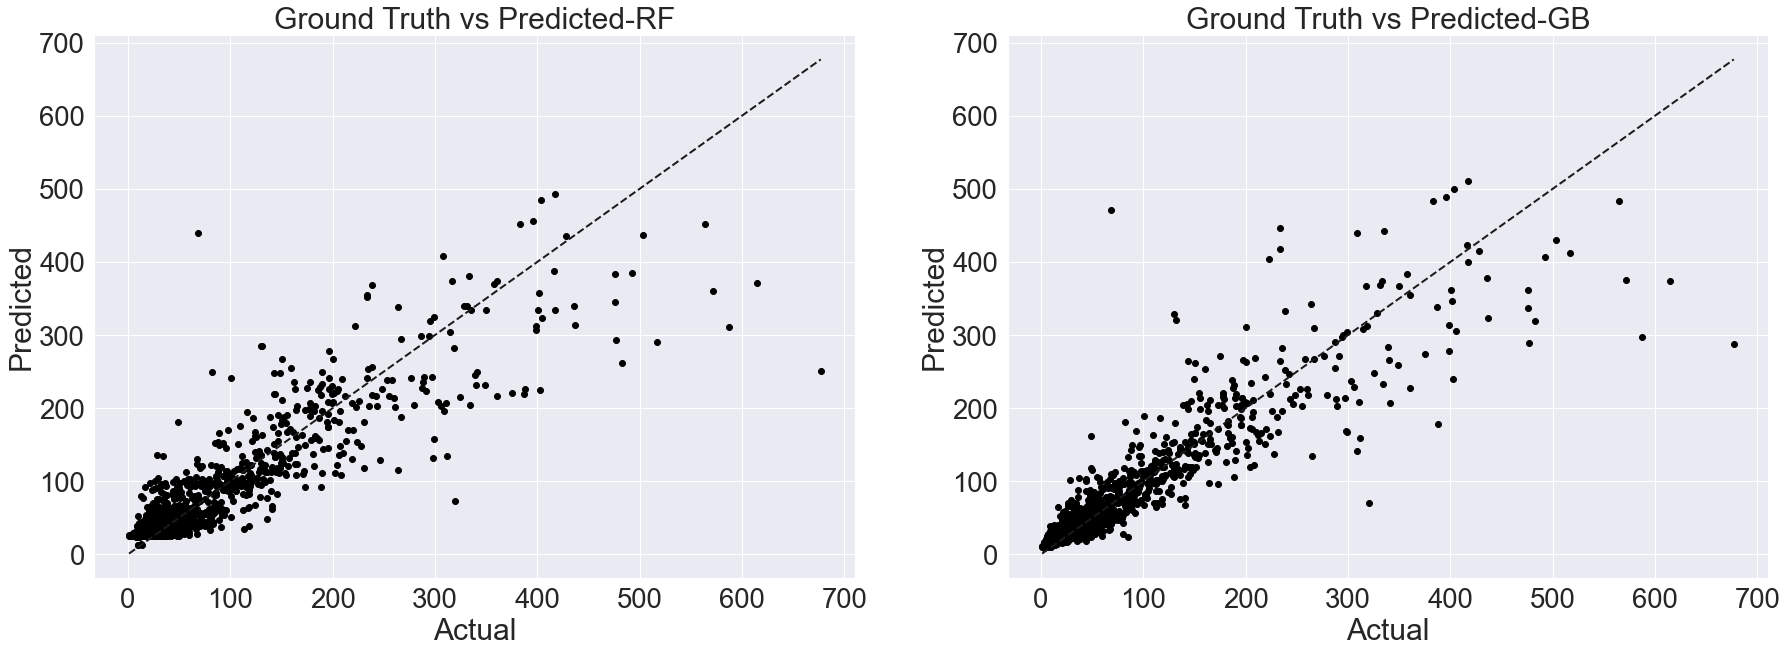

In [87]:
# Visualize and compare the results
sns.set(font_scale=2.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.scatter(y_test, y_pred_rf, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted-RF')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_gb, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted-GB')
ax2.set(xlabel='Actual', ylabel='Predicted')

## 4.4 Evaluate the models using 10 fold cross validation
Compare the MAE, MSE, RMSE and R2 values in a table

In [88]:
# 10-fold cross validation -All model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
kf = KFold(n_splits=10, shuffle=True)

In [89]:
# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
scores_rf = cross_validate(lin, X, y, cv=kf, scoring=scoring)
y_pred_rf = cross_val_predict(rf, X, y, cv=kf)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
scores_gb = cross_validate(gb, X, y, cv=kf, scoring=scoring)
y_pred_gb = cross_val_predict(gb, X, y, cv=kf)

In [90]:
# calculate the metrics
#Random Forest
mae_rf = np.mean(scores_rf['test_neg_mean_absolute_error']*(-1))
mse_rf = np.mean(scores_rf['test_neg_mean_squared_error']*(-1))
rmse_rf = np.mean(scores_rf['test_neg_root_mean_squared_error']*(-1))
r2_rf = np.mean(scores_rf['test_r2'])

#Gradient Boost
mae_gb = np.mean(scores_gb['test_neg_mean_absolute_error']*(-1))
mse_gb = np.mean(scores_gb['test_neg_mean_squared_error']*(-1))
rmse_gb = np.mean(scores_gb['test_neg_root_mean_squared_error']*(-1))
r2_gb = np.mean(scores_gb['test_r2'])

In [91]:
#construct the comparison table
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'Gradient Boost': [mae_gb, mse_gb, rmse_gb, r2_gb],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Random Forest', 'Gradient Boost'])
comparison

,Metrics,Random Forest,Gradient Boost
0,MAE,34.168944,16.090310
1,MSE,2890.390740,936.564667
2,RMSE,53.594983,30.394282
3,R2,0.570132,0.861228


## 4.5 Evaluate the model using 10 fold cross validation + stratified

Compare the MAE, MSE, RMSE and R2 values in a table

In [92]:
# Custom stratified Cross-validator
np.random.seed(seed=1)
bins = np.linspace(5, 55, 25)
bins = bins.astype(int)
y_binned = np.digitize(y, bins)

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
skf = StratifiedKFold(n_splits=10, shuffle=True)

myCViterator = []
for train_index, test_index in skf.split(X,y_binned):
    myCViterator.append((train_index, test_index))

In [94]:
# 10-fold cross validation -All model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
kf = KFold(n_splits=10, shuffle=True)

# RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
scores_rf = cross_validate(lin, X, y, cv=kf, scoring=scoring)
y_pred_rf = cross_val_predict(rf, X, y, cv=kf)

# GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=80, max_depth=8, random_state=1)
scores_gb = cross_validate(gb, X, y, cv=kf, scoring=scoring)
y_pred_gb = cross_val_predict(gb, X, y, cv=kf)

# calculate the metrics
#Random Forest
mae_rf = np.mean(scores_rf['test_neg_mean_absolute_error']*(-1))
mse_rf = np.mean(scores_rf['test_neg_mean_squared_error']*(-1))
rmse_rf = np.mean(scores_rf['test_neg_root_mean_squared_error']*(-1))
r2_rf = np.mean(scores_rf['test_r2'])

#Gradient Boost
mae_gb = np.mean(scores_gb['test_neg_mean_absolute_error']*(-1))
mse_gb = np.mean(scores_gb['test_neg_mean_squared_error']*(-1))
rmse_gb = np.mean(scores_gb['test_neg_root_mean_squared_error']*(-1))
r2_gb = np.mean(scores_gb['test_r2'])

In [95]:
#construct the comparison table
data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R2'],
       'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
       'Gradient Boost': [mae_gb, mse_gb, rmse_gb, r2_gb],
       }

comparison = pd.DataFrame(data, columns= ['Metrics', 'Random Forest', 'Gradient Boost'])
comparison

,Metrics,Random Forest,Gradient Boost
0,MAE,34.157145,16.313125
1,MSE,2884.986253,973.365899
2,RMSE,53.556661,30.962589
3,R2,0.572126,0.856187
